# Практична робота № 9
### Тема. Стиснення даних. Кодування і декодування Гафмена
### Мета: набути практичних навичок застосування алгоритму оптимального кодування Гафмена

<h2 style="text-align: center;">Хід роботи</h2>

20. Маємо текст AABBAABBBABBAABBAABBBBCCCDDDEFFFF. Закодувати текст, використовуючи алгоритм Гафмена. Побудувати двійкове дерево. Оцінити ефект від кодування порівняно з неоптимальним випадком.


Неоптимальний випадок: 132 bits
метод алгоритма Гафмена: 75 bits
Різниця: 1.76


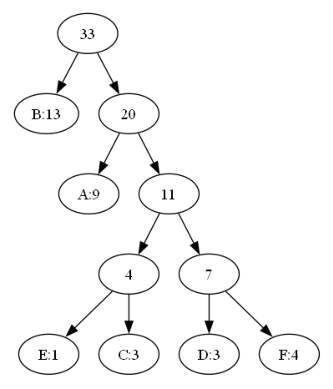

In [12]:
import heapq
from collections import defaultdict
import graphviz
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Клас для представлення вузла дерева Гафмена
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    
    # Порівняння для вставки в heapq
    def __lt__(self, other):
        return self.freq < other.freq

# Побудова дерева Гафмена
def build_huffman_tree(frequencies):
    # Створення черги з вузлів
    heap = [Node(char, freq) for char, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        # Беремо два вузли з найменшою частотою
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        # Створюємо новий вузол з сумарною частотою
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right

        # Додаємо новий вузол назад у чергу
        heapq.heappush(heap, merged)

    return heap[0]

# Отримуємо код для кожного символу
def get_huffman_codes(root, prefix='', codes={}):
    if root is None:
        return codes
    # Якщо це лист, додаємо його код
    if root.char is not None:
        codes[root.char] = prefix
    # Рекурсивно проходимо по лівому та правому піддереву
    get_huffman_codes(root.left, prefix + '0', codes)
    get_huffman_codes(root.right, prefix + '1', codes)
    return codes

# Функція для візуалізації дерева Гафмена
def visualize_huffman_tree(root):
    def add_edges(node, graph, parent=None):
        if node is None:
            return
        if node.char is not None:
            graph.node(str(id(node)), label=f"{node.char}:{node.freq}")
        else:
            graph.node(str(id(node)), label=f"{node.freq}")
        if parent:
            graph.edge(str(id(parent)), str(id(node)))
        if node.left:
            add_edges(node.left, graph, node)
        if node.right:
            add_edges(node.right, graph, node)

    # Створюємо граф
    graph = graphviz.Digraph(format='png')
    add_edges(root, graph)
    
    # Генеруємо зображення та відразу відображаємо
    file_path = graph.render('huffman_tree', format='png', cleanup=True)  # Зберігаємо в файл
    img = mpimg.imread(file_path)  # Завантажуємо зображення
    imgplot = plt.imshow(img)  # Відображаємо зображення
    plt.axis('off')  # Вимикаємо осі
    plt.show()  # Відображаємо зображення відразу

# Оцінка ефекту від кодування
def calculate_compression(text, frequencies, huffman_codes):
    # Оцінка для фіксованого кодування (4 біти на символ)
    original_size = len(text) * 4  # Кількість бітів для фіксованого кодування (по 4 біти на символ)
    
    # Оцінка для кодування Гафменом
    compressed_bits = sum(frequencies[char] * len(huffman_codes[char]) for char in frequencies)

    print(f"\nНеоптимальний випадок: {original_size} bits")
    print(f"метод алгоритма Гафмена: {compressed_bits} bits")
    print(f"Різниця: {original_size / compressed_bits:.2f}")

# Оновлення частоти символів та кодування
frequencies = {
    'A': 9,
    'B': 13,
    'C': 3,
    'D': 3,
    'E': 1,
    'F': 4
}

text = 'AABBAABBBABBAABBAABBBBCCCDDDEFFFF'

root = build_huffman_tree(frequencies)
huffman_codes = get_huffman_codes(root)

# Оцінка ефекту від кодування
calculate_compression(text, frequencies, huffman_codes)

# Візуалізація дерева Гафмена та відображення
visualize_huffman_tree(root)



## **Контрольні питання**

1. Що таке кодування Гафмена та як воно працює?

Кодування Гафмена — це алгоритм стиснення даних, який використовує змінний довжини бітові коди для представлення символів. Алгоритм базується на частоті символів: частіше зустрічаються символи отримують коротші коди, рідше — довші. Процес включає побудову спеціального дерева, яке дає оптимальні коди для кожного символу:

Створюється дерево, де символи є листями, і два вузли з найменшою частотою комбінуються в новий вузол.
Повторюється цей процес, поки не з'явиться корінь дерева.
Для кожного символу визначається код шляхом руху від кореня до відповідного листа (0 для лівої гілки, 1 для правої).

2. Як визначається оптимальний двійковий код Гафмена для стиснення даних?

Оптимальний двійковий код Гафмена визначається на основі частоти символів у вхідних даних. Часті символи отримують коротші коди, а рідкісні — довші. Алгоритм працює таким чином:

Визначається частота кожного символу в даних.
Створюється дерево Гафмена за допомогою алгоритму злиття найменших частот.
Коди для символів визначаються через шлях від кореня дерева до листя: лівий шлях позначається 0, правий — 1.

3. Які переваги має кодування Гафмена над іншими методами стиснення даних?

Переваги кодування Гафмена:

Оптимальність: Це один з оптимальних методів стиснення для невідомих або змішаних даних, особливо якщо йдеться про великий набір символів з різними частотами.
Простота: Алгоритм реалізується відносно просто.
Адаптивність: Кодування Гафмена змінює довжину коду в залежності від частоти символів, що дозволяє значно зменшити розмір даних.

4. Як відбувається декодування даних, закодованих за допомогою кодування Гафмена?
   
Декодування за допомогою кодування Гафмена відбувається за допомогою дерева Гафмена:

Починається з кореня дерева.
Для кожного бітового значення у закодованому повідомленні (0 або 1) переміщаємося по дереву: 0 — ліворуч, 1 — праворуч.
Коли доходимо до листа, це означає, що ми знайшли символ, який відображає цей бітовий рядок.
Процес повторюється до кінця закодованого повідомлення.

5. Які є можливі недоліки кодування Гафмена?

   
Немає адаптації під зміни даних: Якщо вхідні дані змінюються, треба знову будувати дерево.
Не підходить для дуже малих наборів даних: Алгоритм може бути неефективним, якщо частота символів надто схожа.
Витрати на зберігання дерева: Для коректного декодування потрібно передати або зберігати дерево, що може займати додаткові ресурси.

6. Для чого використовується побудова дерева в кодуванні Гафмена?
Дерево Гафмена використовується для:

Генерації кодів: Кожен символ отримує свій код залежно від його позиції в дереві. Чим частіше символ зустрічається, тим ближче він знаходиться до кореня дерева і має коротший код.
Декодування: Дерево є основою для відновлення оригінальних даних з закодованого повідомлення, оскільки шлях від кореня до листа дає код для відповідного символу.